## Rainfall analysis in India

In [2]:
# import required libraries and the data set
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r"C:\Users\HP\Downloads\rainfall_area-wt_India_1901-2015.csv")
df.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REGION   115 non-null    object 
 1   YEAR     115 non-null    int64  
 2   JAN      115 non-null    float64
 3   FEB      115 non-null    float64
 4   MAR      115 non-null    float64
 5   APR      115 non-null    float64
 6   MAY      115 non-null    float64
 7   JUN      115 non-null    float64
 8   JUL      115 non-null    float64
 9   AUG      115 non-null    float64
 10  SEP      115 non-null    float64
 11  OCT      115 non-null    float64
 12  NOV      115 non-null    float64
 13  DEC      115 non-null    float64
 14  ANNUAL   115 non-null    float64
 15  Jan-Feb  115 non-null    float64
 16  Mar-May  115 non-null    float64
 17  Jun-Sep  115 non-null    float64
 18  Oct-Dec  115 non-null    float64
dtypes: float64(17), int64(1), object(1)
memory usage: 17.2+ KB


In [8]:
df.isnull().sum()

REGION     0
YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
Jan-Feb    0
Mar-May    0
Jun-Sep    0
Oct-Dec    0
dtype: int64

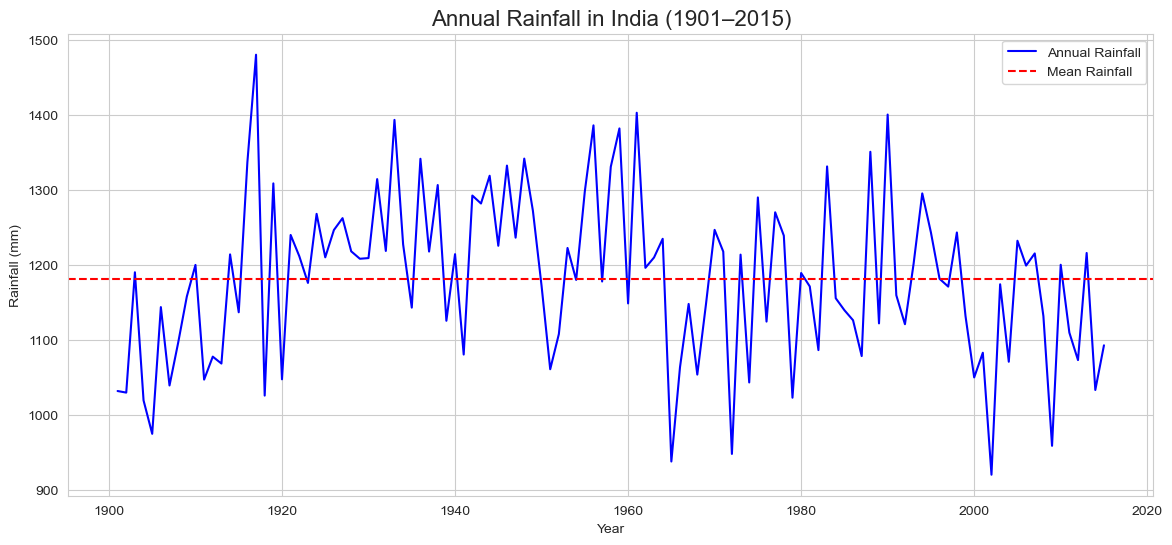

In [10]:
# Annual rainfall trends
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(x="YEAR", y="ANNUAL", data=df, label="Annual Rainfall", color='blue')

# Mean line
plt.axhline(df["ANNUAL"].mean(), color='red', linestyle='--', label="Mean Rainfall")

plt.title("Annual Rainfall in India (1901–2015)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


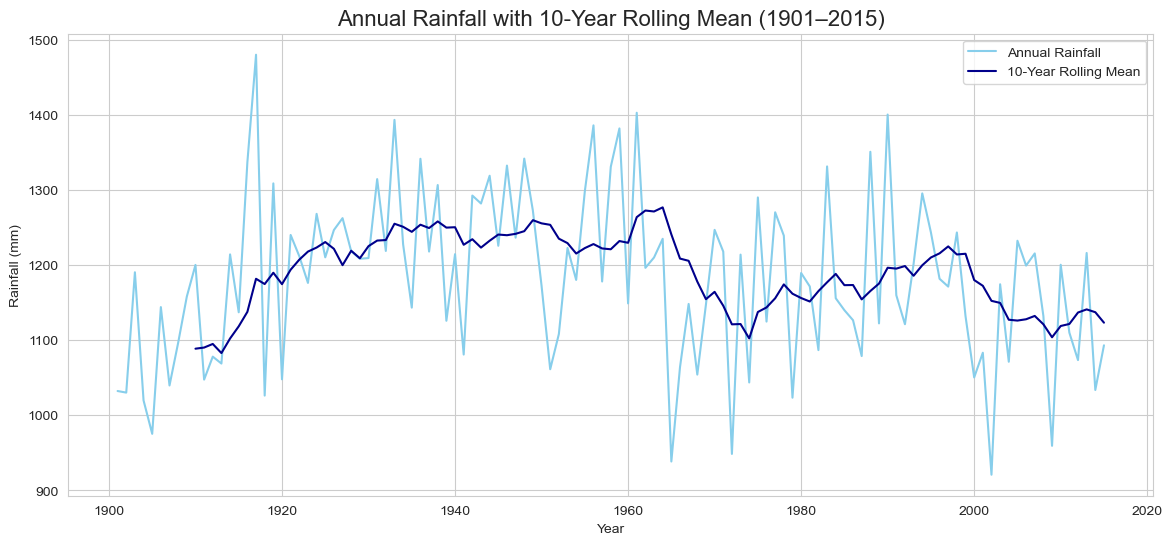

In [13]:
# Add rolling mean
df["Rolling_Mean_10"] = df["ANNUAL"].rolling(window=10).mean()

# Plot both actual and rolling
plt.figure(figsize=(14,6))
sns.lineplot(x="YEAR", y="ANNUAL", data=df, label="Annual Rainfall", color='skyblue')
sns.lineplot(x="YEAR", y="Rolling_Mean_10", data=df, label="10-Year Rolling Mean", color='darkblue')

plt.title("Annual Rainfall with 10-Year Rolling Mean (1901–2015)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


In [15]:
# Create a list of month columns (in order)
month_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Calculate average for each month across all years
monthly_avg = df[month_cols].mean()

# Convert to DataFrame for plotting
monthly_avg_df = pd.DataFrame({'Month': month_cols, 'Average_Rainfall': monthly_avg.values})

                    

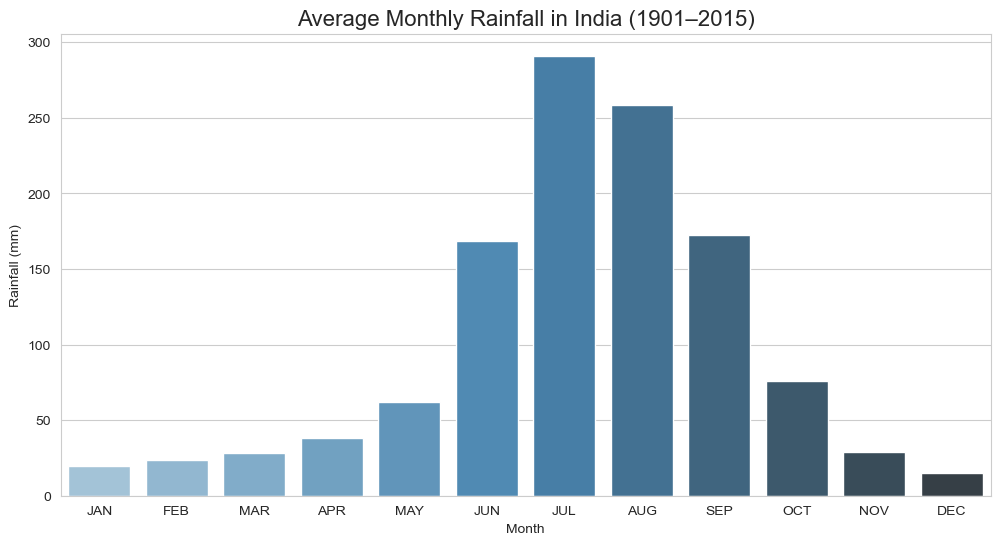

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_avg_df, x='Month', y='Average_Rainfall',hue = 'Month', palette='Blues_d')
plt.title("Average Monthly Rainfall in India (1901–2015)", fontsize=16)
plt.ylabel("Rainfall (mm)")
plt.xlabel("Month")
plt.show()

           

In [21]:
seasonal_avg = {
    'Winter (Jan–Feb)': df[['JAN', 'FEB']].mean(axis=1).mean(),
    'Pre-monsoon (Mar–May)': df[['MAR', 'APR', 'MAY']].mean(axis=1).mean(),
    'Monsoon (Jun–Sep)': df[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1).mean(),
    'Post-monsoon (Oct–Dec)': df[['OCT', 'NOV', 'DEC']].mean(axis=1).mean()
}

# Convert to DataFrame for plotting
seasonal_avg_df = pd.DataFrame({
    'Season': seasonal_avg.keys(),
    'Average_Rainfall': seasonal_avg.values()
})


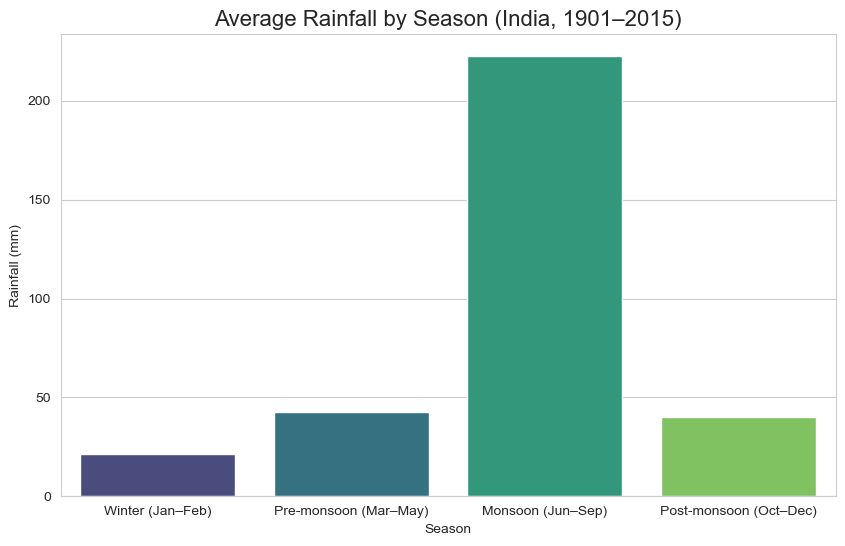

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=seasonal_avg_df, x='Season', y='Average_Rainfall', hue = 'Season', palette='viridis')
plt.title("Average Rainfall by Season (India, 1901–2015)", fontsize=16)
plt.ylabel("Rainfall (mm)")
plt.xlabel("Season")
plt.show()


In [27]:
# List of month columns
month_cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Total average annual rainfall (based on monthly averages)
total_avg_rainfall = df[month_cols].mean().sum()
print("Total Avg Rainfall (All months):", total_avg_rainfall)


Total Avg Rainfall (All months): 1182.0278260869566


In [29]:
# Define season groups
seasons = {
    'Winter (Jan–Feb)': ['JAN', 'FEB'],
    'Pre-monsoon (Mar–May)': ['MAR', 'APR', 'MAY'],
    'Monsoon (Jun–Sep)': ['JUN', 'JUL', 'AUG', 'SEP'],
    'Post-monsoon (Oct–Dec)': ['OCT', 'NOV', 'DEC']
}

# Calculate season-wise average
for season, months in seasons.items():
    seasonal_avg = df[months].mean().sum()
    percent = (seasonal_avg / total_avg_rainfall) * 100
    print(f"{season}: {percent:.2f}% of total rainfall")


Winter (Jan–Feb): 3.65% of total rainfall
Pre-monsoon (Mar–May): 10.89% of total rainfall
Monsoon (Jun–Sep): 75.32% of total rainfall
Post-monsoon (Oct–Dec): 10.14% of total rainfall


In [31]:
# Correlation of all months and seasons with ANNUAL
corr = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
           'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
           'ANNUAL']].corr()

# Show correlation with ANNUAL only
print(corr['ANNUAL'].sort_values(ascending=False))


ANNUAL    1.000000
SEP       0.624676
JUL       0.609355
AUG       0.569233
OCT       0.537205
JUN       0.423355
MAY       0.381378
FEB       0.207108
NOV       0.099001
JAN       0.093038
APR       0.083844
DEC       0.055665
MAR       0.026015
Name: ANNUAL, dtype: float64


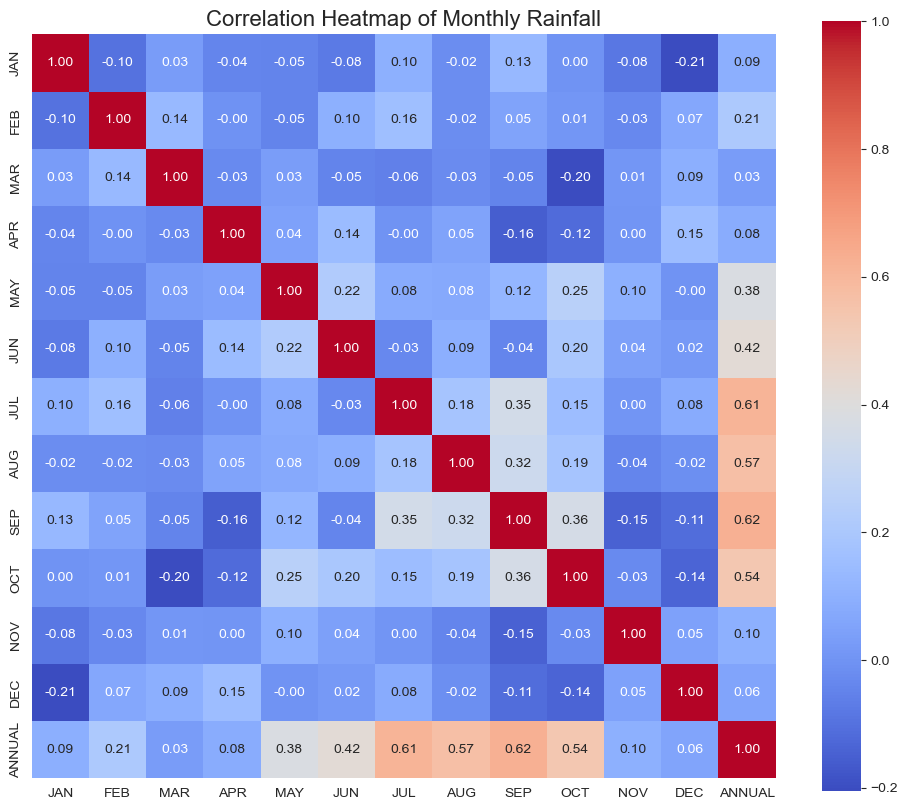

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Monthly Rainfall", fontsize=16)
plt.show()


In [43]:
# Mean and Std Dev
mean_rain = df["ANNUAL"].mean()
std_rain = df["ANNUAL"].std()

# Define drought and excess thresholds
drought_threshold = mean_rain - 1.5 * std_rain
excess_threshold = mean_rain + 1.5 * std_rain

# Find anomalies
drought_years = df[df["ANNUAL"] < drought_threshold]
excess_years = df[df["ANNUAL"] > excess_threshold]

print("Drought Years:")
print(drought_years[["YEAR", "ANNUAL"]])

print("\nExcess Rainfall Years:")
print(excess_years[["YEAR", "ANNUAL"]])


Drought Years:
     YEAR  ANNUAL
4    1905   975.3
64   1965   938.4
71   1972   948.5
101  2002   920.8
108  2009   959.3

Excess Rainfall Years:
    YEAR  ANNUAL
16  1917  1480.3
32  1933  1393.5
55  1956  1386.2
58  1959  1382.1
60  1961  1403.0
87  1988  1351.0
89  1990  1400.6


In [45]:
from sklearn.ensemble import IsolationForest

# Reshape the data for the model
X = df[["ANNUAL"]].values

# Create model
model = IsolationForest(contamination=0.1, random_state=42)
df["anomaly"] = model.fit_predict(X)

# -1 = anomaly (drought or excess)
# 1 = normal year

# Separate the anomalies
ml_anomalies = df[df["anomaly"] == -1]
print("ML-Detected Anomalies:")
print(ml_anomalies[["YEAR", "ANNUAL"]])


ML-Detected Anomalies:
     YEAR  ANNUAL
3    1904  1019.8
4    1905   975.3
16   1917  1480.3
32   1933  1393.5
55   1956  1386.2
58   1959  1382.1
60   1961  1403.0
64   1965   938.4
71   1972   948.5
89   1990  1400.6
101  2002   920.8
108  2009   959.3
